# **Title** - Metal Bands by Nation

# **Link** - https://www.kaggle.com/datasets/mrpantherson/metal-by-nation

This work will be done one 2 csv , one with metal bands and their information and another with information about population

# 0 - Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
metal = pd.read_csv("/content/drive/MyDrive/Python Projects/Metal Bands/CSV/metal_bands_2017.csv", encoding='latin-1')
pop = pd.read_csv("/content/drive/MyDrive/Python Projects/Metal Bands/CSV/world_population_1960_2015.csv", encoding='latin-1')

In [3]:
metal = pd.DataFrame(metal)
pop = pd.DataFrame(pop)

In [4]:
metal.head()

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death


When spilt has "-" means that band hasn´t split

In [5]:
pop.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


# 1- Missing values

## Metal DF

In [6]:
metal.isnull().any()

Unnamed: 0    False
band_name     False
fans          False
formed        False
origin         True
split         False
style         False
dtype: bool

We can see that origin column has missing values, lets see which ones

In [7]:
# How manuy

metal.isnull().sum()

# Column Origin has 8 NaN

Unnamed: 0    0
band_name     0
fans          0
formed        0
origin        8
split         0
style         0
dtype: int64

In [8]:
missing = metal[metal.isnull().any(axis=1)]
display(missing)

,Unnamed: 0,band_name,fans,formed,origin,split,style
460,460,Enshine,175,2009,NaN,-,Gothic doom
989,989,Clouds,61,2013,NaN,2013,Atmospheric doom
1422,1422,Subterranean Masquerade,35,1997,NaN,-,"Progressive,Psychedelic rock"
2614,2614,Twilight Of The Gods,11,2010,NaN,-,Heavy
2996,2996,Archivist,7,2015,NaN,-,"Atmospheric black,Post-metal"
3444,3444,Metallic Taste Of Blood,5,2011,NaN,-,"Progressive,Instrumental"
3941,3941,Level 10,3,2014,NaN,2014,"Heavy,Power"
4201,4201,Death Penalty,2,2013,NaN,2013,"Doom,Heavy"


In [9]:
print("Enshine index number is: ",metal.index[metal["band_name"]=="Enshine"])  # We can use this function to know which index the band_name has
print("Clouds index number is:",metal.index[metal["band_name"]=="Clouds"])

# Its possible to see that the index is displayed in the table above

Enshine index number is:  Int64Index([460], dtype='int64')
Clouds index number is: Int64Index([989], dtype='int64')


### Since the number of values with Nan is not that high i will do an internet research do gather the values myself.

In [10]:
# To correctly name the countries i did a unique function to know how they are display , so i dont confuse UK with United Kingdom

values = metal["origin"].unique()
display(values)

array(['United Kingdom', 'Sweden', 'USA', 'Finland', 'Germany', 'Poland',
       'Norway', 'The Netherlands', 'Switzerland', 'France', 'Brazil',
       'Portugal', 'Australia', 'Greece', 'Italy', 'United Kingdom, USA',
       'Austria', 'Canada', 'Israel', 'Denmark, USA', 'Ireland',
       'Faroe Islands', 'Denmark', 'Russia', 'Ukraine', 'Spain',
       'Israel, The Netherlands', 'Iceland', 'Andorra', 'Tunisia, France',
       'Belgium', 'Romania', 'Chile', 'Japan', 'Colombia, USA', 'Taiwan',
       'Hungary, United Kingdom', nan, 'Hungary', 'New Zealand',
       'Greece, Sweden', 'Sweden, Finland', 'Australia, United Kingdom',
       'Estonia', 'Jordan', 'Latvia', 'Slovenia', 'Iran', 'Mexico',
       'Argentina', 'Turkey', 'UAE', 'Liechtenstein', 'Czech Republic',
       'Norway, Finland', 'Serbia', 'Belgium, United Kingdom', 'Egypt',
       'Russia, Canada', 'Indonesia', 'Iraq, USA', 'Lithuania', 'China',
       'India', 'Slovak Republic', 'Kyrgyzstan, Germany', 'Singapore',
       '

In [11]:
# Enshine
metal["origin"].iloc[460]="Sweden"

#Clouds
metal["origin"].iloc[989]="United Kingdom"

#Subterranean Masquerade
metal["origin"].iloc[1422]="Israel"

#Twilight Of The Gods
metal["origin"].iloc[2614]="Sweden"

#Archivist
metal["origin"].iloc[2996]="Austria"

#Metallic Taste Of Blood
metal["origin"].iloc[3444]="Italy"

#Level 10
metal["origin"].iloc[3941]="Germany"

#Death Penalty
metal["origin"].iloc[4201]="United Kingdom"

<ipython-input-11-427aaca418d0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal["origin"].iloc[460]="Sweden"
<ipython-input-11-427aaca418d0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal["origin"].iloc[989]="United Kingdom"
<ipython-input-11-427aaca418d0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metal["origin"].iloc[1422]="Israel"
<ipython-input-11-427aaca418d0>:11: SettingWithCopyWarning: 
A value is trying to 

In [12]:
metal.iloc[[460,989,1422,2614,2996,3444,3941,4201]]

,Unnamed: 0,band_name,fans,formed,origin,split,style
460,460,Enshine,175,2009,Sweden,-,Gothic doom
989,989,Clouds,61,2013,United Kingdom,2013,Atmospheric doom
1422,1422,Subterranean Masquerade,35,1997,Israel,-,"Progressive,Psychedelic rock"
2614,2614,Twilight Of The Gods,11,2010,Sweden,-,Heavy
2996,2996,Archivist,7,2015,Austria,-,"Atmospheric black,Post-metal"
3444,3444,Metallic Taste Of Blood,5,2011,Italy,-,"Progressive,Instrumental"
3941,3941,Level 10,3,2014,Germany,2014,"Heavy,Power"
4201,4201,Death Penalty,2,2013,United Kingdom,2013,"Doom,Heavy"


## POP dataframe

In [13]:
pop.isnull().any()

Country Name    False
1960             True
1961             True
1962             True
1963             True
1964             True
1965             True
1966             True
1967             True
1968             True
1969             True
1970             True
1971             True
1972             True
1973             True
1974             True
1975             True
1976             True
1977             True
1978             True
1979             True
1980             True
1981             True
1982             True
1983             True
1984             True
1985             True
1986             True
1987             True
1988             True
1989             True
1990             True
1991             True
1992             True
1993             True
1994             True
1995             True
1996             True
1997             True
1998             True
1999             True
2000             True
2001             True
2002             True
2003             True
2004      

In [14]:
pop.isnull().sum().sum()

161

In [15]:
missing2 = pop[pop.isnull().any(axis=1)]

In [16]:
display(missing2)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
66,Eritrea,1407631.0,1441297.0,1476321.0,1512671.0,1550297.0,1589187.0,1629333.0,1670821.0,1713846.0,...,4304440.0,4406299.0,4500638.0,4593549.0,4689664.0,4789568.0,NaN,NaN,NaN,NaN
107,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,Kuwait,261962.0,294639.0,335161.0,381665.0,431366.0,482173.0,533521.0,585831.0,639170.0,...,2389498.0,2538591.0,2705290.0,2881243.0,3059473.0,3239181.0,3419581.0,3593689.0,3753121.0,3892115.0
211,Serbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7411569.0,7381579.0,7350222.0,7320807.0,7291436.0,7234099.0,7199077.0,7164132.0,7130576.0,7098247.0
222,Sint Maarten (Dutch part),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38270.0,39462.0,40458.0,39133.0,35474.0,33435.0,34640.0,36607.0,37685.0,38817.0
256,West Bank and Gaza,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3406334.0,3494496.0,3596688.0,3702218.0,3811102.0,3927051.0,4046901.0,4169506.0,4294682.0,4422143.0


In [17]:
result = metal[metal["origin"].isin(["Eritrea","Kuwait","Not classified","Serbia","Sint Maarten (Dutch part)","West Bank and Gaza	"])]
display(result)

# Since with the values missing above , the only country who has bands is Serbia , i will remove the other ones

,Unnamed: 0,band_name,fans,formed,origin,split,style
1014,1014,Forever Storm,59,2006,Serbia,-,"Heavy,Power"
2130,2130,Alogia,16,2000,Serbia,-,"Power,Progressive"
2144,2144,David Maxim Micic,16,2010,Serbia,-,"Progressive rock,Progressive"
2193,2193,The Stone,16,2001,Serbia,2001,Black
2327,2327,Rain Delay,14,2003,Serbia,2003,Avantgarde
2724,2724,Tales Of Dark...,10,2001,Serbia,-,"Death doom,Gothic"
2917,2917,May Result,8,1995,Serbia,1995,Black
2949,2949,Space Eater,8,2004,Serbia,2004,Thrash
2985,2985,Abonos,7,1999,Serbia,1999,Gothic
2993,2993,Alister,7,1999,Serbia,1999,"Thrash,Heavy"


!!!!! REMOVE LINES

### 2- Duplicatived values

In [18]:
duplicated = metal[metal["origin"].duplicated()]
display(duplicated.sum())

Unnamed: 0                                             12322750
band_name     MegadethAmon AmarthSlayerDeathDream TheaterBla...
fans                                                     397893
formed        1983198819811983198519681993196919901981198919...
origin        USASwedenUSAUSAUSAUnited KingdomFinlandUnited ...
split         1983-198120011985--196919902003198920161995-19...
style         Thrash,Heavy,Hard rockMelodic deathThrashProgr...
dtype: object

In [19]:
megadeth=metal[metal["band_name"]=="Megadeth"]
display(megadeth)

# As we can see there are bands with duplicated values so i will remove them

,Unnamed: 0,band_name,fans,formed,origin,split,style
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
53,53,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"


In [20]:
# len before duplicated = 500 bands

len(metal)

5000

In [21]:
metal = metal.drop_duplicates(subset='band_name', keep='first')
len(metal)

4949

# 3- Análise exploratoria dos dados

3.1-Metal

3.1.1-Bands with the most fans


In [22]:
metal.head(10)

# We can see that the dataframe is already made by order of fans but if we wanted to see it , this would be the line of code
#metal.sort_values("fans")

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
5,5,Slayer,2955,1981,USA,1981,Thrash
6,6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,7,Dream Theater,2329,1985,USA,1985,Progressive
8,8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"
9,9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"


In [23]:
metal.shape

(4949, 7)

In [24]:
metal.nlargest(10,"fans")

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
5,5,Slayer,2955,1981,USA,1981,Thrash
6,6,Death,2690,1983,USA,2001,"Progressive death,Death,Progressive thrash"
7,7,Dream Theater,2329,1985,USA,1985,Progressive
8,8,Black Sabbath,2307,1968,United Kingdom,-,"Doom,Heavy,Hard rock"
9,9,Nightwish,2183,1996,Finland,1996,"Symphonic power,Gothic,Symphonic"


In [25]:
metal.nsmallest(10,"fans")

,Unnamed: 0,band_name,fans,formed,origin,split,style
4973,4973,Ömheten,0,2012,Sweden,2012,Depressive black
4974,4974,(In)Trance,0,2009,Russia,-,Gothic
4975,4975,6th Dimension,0,2008,Cyprus,2008,"Alternative,Progressive"
4976,4976,9.7 Richter,0,2006,Romania,-,Heavy
4977,4977,A Lower Deep,0,2000,USA,2000,"Progressive,Thrash,Power"
4978,4978,Absence Of The Sacred,0,2005,Singapore,-,"Progressive death,Thrash"
4979,4979,Ace Of Hearts,0,2008,United Kingdom,2008,"Gothic,Hard rock"
4980,4980,Aeturnus Dominion,0,2003,Australia,-,Death
4981,4981,Algy Ward's Tank,0,2007,United Kingdom,2007,Heavy
4982,4982,Altars Of Grief,0,2013,Canada,-,"Funeral doom,Death doom,Atmospheric doom"


### 3.1.2Countries with the most fans

In [26]:
paises = metal.groupby("origin")["fans"].sum()

In [27]:
# Most fans
display("Top 10 countries with the most fans")
display(paises.nlargest(10))

'Top 10 countries with the most fans'

origin
USA                99448
Sweden             47378
Finland            32909
United Kingdom     32606
Germany            29548
Norway             22416
Canada              8895
The Netherlands     8819
Italy               7184
France              7164
Name: fans, dtype: int64

In [28]:
top10= paises.nlargest(10)
display(top10)

origin
USA                99448
Sweden             47378
Finland            32909
United Kingdom     32606
Germany            29548
Norway             22416
Canada              8895
The Netherlands     8819
Italy               7184
France              7164
Name: fans, dtype: int64

Text(0.5, 1.0, 'Countries with the most fans')

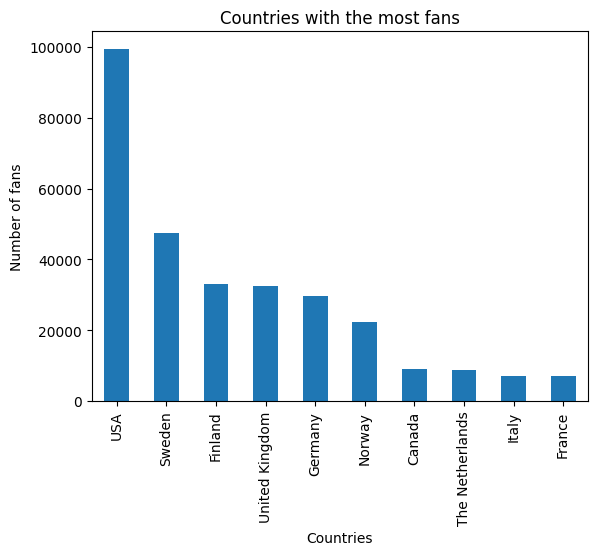

In [29]:
top10.plot(kind="bar",x="origin",y="fans")
plt.xlabel("Countries")
plt.ylabel("Number of fans")
plt.title("Countries with the most fans")

# We can interpreter that USA has by far the most numbers of fans

In [30]:
# Whats the % of Usa bands

print("The total number of bands is:",len(metal))
print("The total number of USA bands is: ",len(metal[metal["origin"]=="USA"]))

percentage = (len(metal[metal["origin"]=="USA"])/len(metal))*100

print("The total percentage of USA bands in the datafram is %.2f %%" % percentage)   # its necessary to put %% in order for the % to appear in output

The total number of bands is: 4949
The total number of USA bands is:  1123
The total percentage of USA bands in the datafram is 22.69 %


In [31]:
# Whats the % do USA fans

print("The total number of fans is : ", metal["fans"].sum())
print("The total number of fans of USA bands is : ", metal[metal["origin"]=="USA"]["fans"].sum())

total = metal["fans"].sum()
usa = metal[metal["origin"]=="USA"]["fans"].sum()

print("The total % of usa fans is " , round((usa/total*100),2),"%")

The total number of fans is :  348122
The total number of fans of USA bands is :  99448
The total % of usa fans is  28.57 %


### 3.1.3 - Countries with the least fans

In [32]:
least10=paises.nsmallest(10)

Text(0.5, 1.0, 'Countries with the least fans')

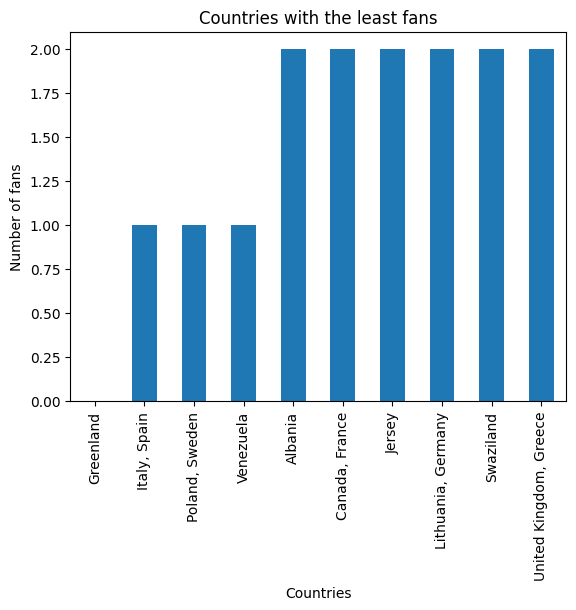

In [33]:
least10.plot(kind="bar", x="origin", y="fans")
plt.xlabel("Countries")
plt.ylabel("Number of fans")
plt.title("Countries with the least fans")

### 3.1.4- Portugal


In [34]:
bands_portugal = len(metal[metal["origin"]=="Portugal"]["band_name"].sum())
print("There is a total of {0} bands in Portugal".format (bands_portugal))

There is a total of 516 bands in Portugal


In [35]:
bands_pt = metal[metal["origin"]=="Portugal"]["band_name"]
display(bands_pt)

print("The total number of bands in Portugal is : ",bands_pt.count())

43                         Moonspell
561                       Heavenwood
887                 Process Of Guilt
964                           Desire
1199                      Ava Inferi
1200                 Before The Rain
1300                         Gwydion
1548                 Mourning Lenore
1565                      Daemonarch
1793                            Ramp
2052                   Vertigo Steps
2069                 Corpus Christii
2226             Head Control System
2229              Holocausto Canibal
2303                         Hyubris
2411                     Switchtense
2417                    The Spektrum
2504                       Tarantula
2571                       Ironsword
2601                    Shadowsphere
2783          Icon & The Black Roses
2830                     Thee Orakle
3016                         Colosso
3077                 Midnight Priest
3194                         Decayed
3254                       Men Eater
3332                      Adamantine
3

The total number of bands in Portugal is :  43


In [36]:
total_world= metal["fans"].sum()
total_pt= metal[metal["origin"]=="Portugal"]["fans"].sum()

print("The total number of fans is : ",total_world)
print("The total number of fans in Portugal is: ", total_pt)
print("The % of portuguese fans is : ",round((total_pt/total_world*100),2),"%")

The total number of fans is :  348122
The total number of fans in Portugal is:  1878
The % of portuguese fans is :  0.54 %


### Most style

In [37]:
style_counts = metal['style'].value_counts().reset_index()
style_counts.columns = ['style', 'count']
style_counts = style_counts.sort_values(by='count', ascending=True)

display(style_counts)

,style,count
613,"Doom,Stoner,Psychedelic rock",1
821,"Progressive power,Folk",1
820,"Symphonic black,Extreme gothic",1
819,"Gothic,Glam rock,Gothic rock,Punk rock",1
818,"Progressive rock,Avantgarde rock",1
...,...,...
4,Progressive,144
3,Power,146
2,Heavy,180
1,Death,249


### Pop data analysis

In [38]:
display(pop)


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,58385.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,21888.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,10599790.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,6066094.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,"Yemen, Rep.",5166311.0,5251663.0,5339285.0,5429501.0,5522690.0,5619170.0,5720538.0,5827223.0,5937125.0,...,21093973.0,21701105.0,22322699.0,22954226.0,23591972.0,24234940.0,24882792.0,25533217.0,26183676.0,26832215.0
260,South Africa,17396000.0,17949962.0,18459442.0,18936138.0,19390554.0,19832000.0,20268594.0,20707258.0,21153722.0,...,47921682.0,48596781.0,49296223.0,50020918.0,50771826.0,51549958.0,52356381.0,53192216.0,54058647.0,54956920.0
261,"Congo, Dem. Rep.",15248246.0,15637715.0,16041247.0,16461914.0,16903899.0,17369859.0,17861860.0,18378189.0,18913177.0,...,57926840.0,59834875.0,61809278.0,63845097.0,65938712.0,68087376.0,70291160.0,72552861.0,74877030.0,77266814.0
262,Zambia,3049586.0,3142848.0,3240664.0,3342894.0,3449266.0,3559687.0,3674088.0,3792864.0,3916928.0,...,12381509.0,12738676.0,13114579.0,13507849.0,13917439.0,14343526.0,14786581.0,15246086.0,15721343.0,16211767.0


In [39]:
display(metal)

,Unnamed: 0,band_name,fans,formed,origin,split,style
0,0,Iron Maiden,4195,1975,United Kingdom,-,"New wave of british heavy,Heavy"
1,1,Opeth,4147,1990,Sweden,1990,"Extreme progressive,Progressive rock,Progressive"
2,2,Metallica,3712,1981,USA,-,"Heavy,Bay area thrash"
3,3,Megadeth,3105,1983,USA,1983,"Thrash,Heavy,Hard rock"
4,4,Amon Amarth,3054,1988,Sweden,-,Melodic death
...,...,...,...,...,...,...,...
4995,4995,Atara,0,2006,France,2006,"Black,Grindcore"
4996,4996,Avicularia,0,2003,Croatia,-,Avantgarde death
4997,4997,Awake,0,2006,United Kingdom,2006,"Heavy,Progressive"
4998,4998,Axatak,0,1983,Australia,1988,"Hard rock,Heavy"
